# Exercise "Lecture 13: Classification"

YT Advice: **statquest**

In this set of exercises, we will use classification to classify Wikipedia articles into 16 categories. 


The exercises cover the following points:

* Storing the data into an pandas dataframe and inspecting the data
* Converting the corpus into a tfd-idf document token matrix
* Learning a perceptron model from the data 
* Inspecting the results

Data: wkp_sorted.zip      

Python libraries
- sklearn
- pandas 
- nltk
- numpy

Cheat sheets
- classification_cheat_sheet.ipynb

## Loading the data

**Exercice 1**

**1a. Load the data**
* The data file is in "wkp_sorted.zip"
* Use the [load_files](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html) method from sklearn.datasets to load all files 
* load_files returns a dictionnary named "data" with keys "data" (a list of strings, one string per file), "target" (a list of label indexes, one label index per file) and "target_names" (the list of categories). 
* use the keys() method (python CS, dictionary) to view the keys of the dictionary created by the load_files methods

You should see this: 

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files

In [2]:
# YOUR CODE HERE
DIR = "../class10-clustering/wkp_sorted/"
data = load_files(DIR, encoding="utf-8", decode_error="replace", random_state=42)
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
print(len(data.data), len(data.target))

160 160


**1b. Create a pandas dataframe containing the data.**

[Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) 


- Create a dataframe whose headers are "texts" and "label_idx". 
Each row aligns the content of a file ("text" column) and its corresponding label index (the "label_idx" column). 

In [4]:
# YOUR CODE HERE
df = pd.DataFrame([[c,i] for c,i in zip(data.data, data.target)], columns=["text", "label_idx"])
df

,text,label_idx
0,Khozh-Ahmed Tashtamirovich Noukhayev (Russian:...,10
1,Under Western Stars is a 1938 American Western...,10
2,"Akperan Orshi Polytechnic, Yandev is a tertiar...",14
3,"Savonlinna (UK: , Finnish: [ˈsɑʋonˌlinːɑ], lit...",5
4,Cloghanmore is a megalithic chamber tomb of th...,9
...,...,...
155,Aktieselskab (pronounced [ˈɑkɕəselˌskɛˀp]; abb...,7
156,"Omer Vrioni (in Greek spelling: Ομέρ Βρυώνης, ...",10
157,"Ala Kheir (Arabic: علاء خير, born April 1, 198...",1
158,The Akshar Deri is a major site of pilgrimage ...,9


**1c. Create an index-to-label mapping**
- Create a dataframe with header idx2labels and content the 16 categories (from 'target_names', see above)
- Use this dataframe to create a dictionary mapping integers to category names

_**Hint:**_ Use pandas to_dict() method

The result should be something like this:


{0: 'Airports',
 1: 'Artists',
 2: 'Astronauts',
 3: 'Astronomical_objects',
 4: 'Building',
 5: 'City',
 6: 'Comics_characters',
 7: 'Companies',
 8: 'Foods',
 9: 'Monuments_and_memorials',
 10: 'Politicians',
 11: 'Sports_teams',
 12: 'Sportspeople',
 13: 'Transport',
 14: 'Universities_and_colleges',
 15: 'Written_communication'}

In [5]:
df_categories = pd.DataFrame(data.target_names, columns=["category"])
map = df_categories["category"].to_dict()
map

{0: 'Airports',
 1: 'Artists',
 2: 'Astronauts',
 3: 'Astronomical_objects',
 4: 'Building',
 5: 'City',
 6: 'Comics_characters',
 7: 'Companies',
 8: 'Foods',
 9: 'Monuments_and_memorials',
 10: 'Politicians',
 11: 'Sports_teams',
 12: 'Sportspeople',
 13: 'Transport',
 14: 'Universities_and_colleges',
 15: 'Written_communication'}

**1d. Add a label_name column to the dataframe created in 1b.**

- Using the dictionary you just created, define a function mapping index to label
- apply this function to the 'label_idx' column of the dataframe created in 1b
- Add the resulting dataframe to the 1b df

You should get something like this:

                                 texts	label_idx	label_name   
0	The Cardiff Roller Collective (CRoC) are a rol...	11	Sports_teams   
1	"Go! Pack Go!" is the fight song of the Green ...	11	Sports_teams   
2	Al-Machriq (English translation: The East) was...	14	Universities_and_colleges   
3	...

In [6]:
df["label_name"] = df["label_idx"].map(map)
df

,text,label_idx,label_name
0,Khozh-Ahmed Tashtamirovich Noukhayev (Russian:...,10,Politicians
1,Under Western Stars is a 1938 American Western...,10,Politicians
2,"Akperan Orshi Polytechnic, Yandev is a tertiar...",14,Universities_and_colleges
3,"Savonlinna (UK: , Finnish: [ˈsɑʋonˌlinːɑ], lit...",5,City
4,Cloghanmore is a megalithic chamber tomb of th...,9,Monuments_and_memorials
...,...,...,...
155,Aktieselskab (pronounced [ˈɑkɕəselˌskɛˀp]; abb...,7,Companies
156,"Omer Vrioni (in Greek spelling: Ομέρ Βρυώνης, ...",10,Politicians
157,"Ala Kheir (Arabic: علاء خير, born April 1, 198...",1,Artists
158,The Akshar Deri is a major site of pilgrimage ...,9,Monuments_and_memorials


**1e. Create a dictonary for the reverse mapping label_to_idx**

You should get something like this: 
    
{'Airports': 0,
 'Artists': 1,
 'Astronauts': 2,
 'Astronomical_objects': 3,
 'Building': 4,
 'City': 5,
 'Comics_characters': 6,
 'Companies': 7,
 'Foods': 8,
 'Monuments_and_memorials': 9,
 'Politicians': 10,
 'Sports_teams': 11,
 'Sportspeople': 12,
 'Transport': 13,
 'Universities_and_colleges': 14,
 'Written_communication': 15}

In [7]:
rev_dict = {v: k for k, v in map.items()}
rev_dict

{'Airports': 0,
 'Artists': 1,
 'Astronauts': 2,
 'Astronomical_objects': 3,
 'Building': 4,
 'City': 5,
 'Comics_characters': 6,
 'Companies': 7,
 'Foods': 8,
 'Monuments_and_memorials': 9,
 'Politicians': 10,
 'Sports_teams': 11,
 'Sportspeople': 12,
 'Transport': 13,
 'Universities_and_colleges': 14,
 'Written_communication': 15}

**Exercise 2**

- Shuffle the data 

In [8]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)
df

,text,label_idx,label_name
105,Aiwowo (Chinese: 艾窩窩; pinyin: àiwōwo) is a tra...,8,Foods
108,Metakaolin is the anhydrous calcined form of t...,4,Building
141,Wolfgang Nordwig (born 27 August 1943) is a fo...,12,Sportspeople
55,Tracy Caldwell Dyson (born Tracy Ellen Caldwel...,2,Astronauts
94,Lancelot Richard Gibbs (born 29 September 1934...,12,Sportspeople
...,...,...,...
71,Carniny Amateur & Youth FC is a junior-level f...,11,Sports_teams
106,"Al Jazeera Media Network, endowed by the Gover...",7,Companies
14,"John McCreary Fabian (born January 28, 1939) i...",2,Astronauts
92,Aisam-ul-Haq Qureshi is a professional tennis ...,12,Sportspeople


## Vectorizing the input texts

**Exercise 3**

* Extract $X$ and $Y$ from the dataframe 
* $X$ = the features used for clustering. The features of a news items is the list of tokens contained in that item. We hope that words can help classify news items into the correct category
* $Y$ = the category (Astronaut, etc.) of each Wikipedia article


In [9]:
Y = df["label_name"] # target
X = df["text"].apply(str.lower) # features

**Exercise 4**

Create train and test data
* Use sklearn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(128,) (128,)
(32,) (32,)


**Exercise 5**

Vectorize the input (X)

Use sklearn [TfidfVectorizer]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to turn the news items into a TF-IDF matrix where each row represents a news item, the columns are tokens and the cell contains the tf-idf score of each token.

* Import the [TfidfVectorize](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method from sklearn
* Create a tf-idf vectorizer. The maximum nb of features should be set to 400. Set use_idf to True, stop_words to "english" and the tokenizer to nltk.word_tokenize.
* Apply the tfidf_vectorizer.fit_transform method to X to vectorize all input texts (i.e., both X_train and X_test)

In [11]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleuze3u\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
# Creating a TF-IDF vectorize
vect = TfidfVectorizer(stop_words="english",
                       tokenizer = nltk.word_tokenize,
                       max_features= 400,
                       use_idf= True)

# Fit and transform the vectorizer on the training set and the test set
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Exercise 6**

- Use the [get_feature_names](https://scikit-learn.org/stable/modules/feature_extraction.html) method to print out the features
- Look at the features: are they all useful or would further preprocessing help eliminate uniformative tokens ?

In [15]:
feats = vect.get_feature_names_out()
print(len(feats), feats) # some non informative features

400 ['#' '%' "'" "''" "'s" '(' ')' ',' '-' '.' '1' '10' '11' '12' '2' '2005'
 '2008' '2009' '2010' '2011' '2012' '2013' '2015' '2017' '2018' '3' '4'
 ':' ';' '==' '===' '====' '[' ']' '``' 'according' 'activities' 'africa'
 'african' 'age' 'air' 'aircraft' 'airlines' 'airport' 'airports'
 'airspace' 'ajman' 'al' 'aldrin' 'american' 'apollo' 'appeared' 'appears'
 'april' 'arab' 'arabic' 'area' 'areas' 'army' 'art' 'association'
 'astronaut' 'atmospheric' 'attack' 'attacks' 'august' 'authority'
 'avengers' 'aviation' 'award' 'base' 'based' 'board' 'body' 'born'
 'bread' 'britain' 'british' 'building' 'built' 'burial' 'bus' 'business'
 'california' 'called' 'canada' 'cannonball' 'captain' 'career' 'caste'
 'castes' 'catherine' 'cemetery' 'center' 'central' 'century' 'certain'
 'championships' 'channel' 'character' 'check-in' 'china' 'chinese' 'city'
 'class' 'club' 'co.' 'college' 'companies' 'company' 'considered'
 'construction' 'control' 'controlled' 'council' 'countries' 'country'
 'c

## Training a perceptron classifier


**Exercise 7**

* Import the [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) module 
* Create an object of the class Perceptron
* Train the model using the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.fit) method
* Test the model using the [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.fit)
 method
* Print out expected values and predictions
* Print out accuracy using [sklearn accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) method
* Print out [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)and [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [18]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# create a perceptron object
p = Perceptron(random_state=42)

# train the perceptron
p.fit(X_train_vect, y_train)

# test the model
y_pred = p.predict(X_test_vect) 

# print expected vs predicted
pred_vs_exp = pd.DataFrame({"expected": y_test, "predicted": y_pred})
pred_vs_exp

,expected,predicted
80,Sports_teams,Sports_teams
46,Foods,Universities_and_colleges
129,Transport,Universities_and_colleges
27,City,City
125,Artists,City
104,Astronomical_objects,Astronomical_objects
149,Sports_teams,Sports_teams
11,Foods,Foods
5,Astronauts,Astronauts
37,Building,Monuments_and_memorials


In [19]:
# print accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.5


<AxesSubplot: >

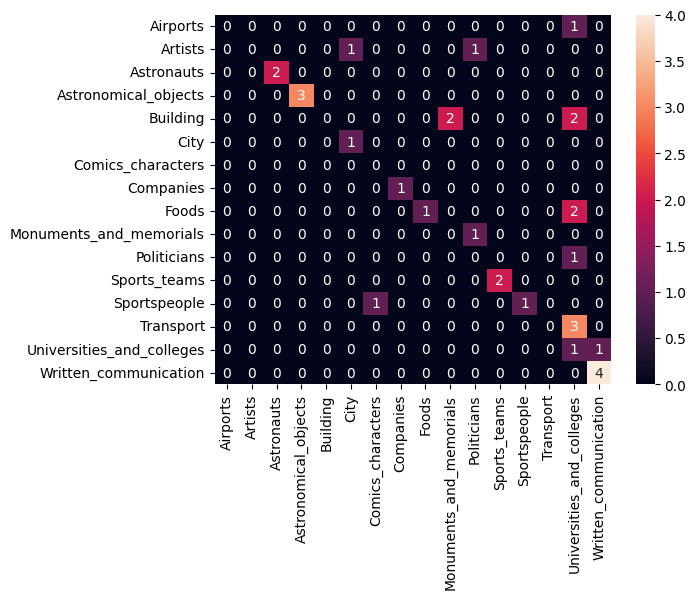

In [33]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

# Print confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
heatmap(cm, annot=True, xticklabels=map.values(), yticklabels=map.values())

In [34]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=map.values()))

                           precision    recall  f1-score   support

                 Airports       0.00      0.00      0.00         1
                  Artists       0.00      0.00      0.00         2
               Astronauts       1.00      1.00      1.00         2
     Astronomical_objects       1.00      1.00      1.00         3
                 Building       0.00      0.00      0.00         4
                     City       0.50      1.00      0.67         1
        Comics_characters       0.00      0.00      0.00         0
                Companies       1.00      1.00      1.00         1
                    Foods       1.00      0.33      0.50         3
  Monuments_and_memorials       0.00      0.00      0.00         1
              Politicians       0.00      0.00      0.00         1
             Sports_teams       1.00      1.00      1.00         2
             Sportspeople       1.00      0.50      0.67         2
                Transport       0.00      0.00      0.00     

c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

**Exercise 8**

* sklearn tfidf_vectorizer creates a vocabulary dictionary {(k,v),} where k is a token and v is an index (integer)
   - Create a dictionary ix_to_tag mapping each index to the corresponding token  and a dictionary tag_to_idx mapping each token to the corresponding index
* The [coef_ ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.fit) attribute contains the learned weights for each feature. Size = nb of classes, nb of features. 
* Save the feature weights in a dictionary where key = token index, value = weight
* Define a function that derives a sorted list of (tokenIndex, weight) pairs
* For each class, 
   -  get the feature weights for each class
   - Sort the weights
   - Print out the first 6 token:weight pairs (replace token indices by the corresponding token)

To better see whether the top words of each class match the corresponding class, use the "idx_to_label" dictionary defined in Exercise 1 to rewrite each class idx to the corresponding label. 

In [36]:
# Creating dictionnaries to map tags to indices and vice versa
ix_to_tag = {v: k for k, v in vect.vocabulary_.items()}
tag_to_ix = vect.vocabulary_

In [46]:
p.coef_.shape

(16, 400)

In [65]:
def print_top_features_per_class(classes_dict, weights, n = 6):
    
    for class_name in classes_dict:
        class_idx = classes_dict[class_name]
        class_weights_per_feature = {ix_to_tag[i]: e for i, e in enumerate(weights[class_idx])}
        top_n = sorted(class_weights_per_feature.items(), key=lambda x: x[1], reverse=True)[:n]

        print(f"'{class_name}' top features: {[x[0] for x in top_n]}")


In [67]:
print_top_features_per_class(rev_dict, p.coef_, n=10)

'Airports' top features: ['’', '—', '–', 'young', 'years', 'year', 'x-men', 'world', 'worked', 'work']
'Artists' top features: ['work', 'art', 'african', 'like', 'isbn', 'stohlman', 'born', 'known', 'natural', 'seen']
'Astronauts' top features: ['space', 'aldrin', 'mission', 'nasa', 'astronaut', 'medal', 'isbn', 'pilot', 'news', 'event']
'Astronomical_objects' top features: ['observed', 'star', 'sky', 'nebula', 'small', 'council', 'john', 'london', 'required', 'crab']
'Building' top features: ['construction', 'merlin', 'surface', 'order', 'form', 'high', 'reported', 'used', 'art', 'required']
'City' top features: ['town', 'theatre', 'mi', 'people', 'march', '%', 'caste', ':', 'castes', 'south']
'Comics_characters' top features: ['home', 'gnarrk', 'lori', 'victor', 'list', 'saturnyne', 'media', 'new', '-', '#']
'Companies' top features: ['jazeera', 'companies', 'board', 'channel', 'east', 'english', 'limited', 'november', 'public', 'king']
'Foods' top features: ['make', 'used', 'city', 

### Performing grid search to find the best possible score and best alpha value (PROVIDED)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Tuning using grid search cross-validation
# Create an object GridSearchCV

parameters = [a for a in np.linspace(0.01,1,11)]
clf = GridSearchCV( estimator=MultinomialNB(), 
                   param_grid={'alpha':parameters},
                   scoring='accuracy',
                   return_train_score=True,
                   cv=5
                  )

# Start the search over the hyper-parameters by calling the fit function over X_train
clf.fit( X_train_vect, y_train )

# Print the results of the CV using the attribute *cv_results_*
cv_res = pd.DataFrame(clf.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003199,0.001469,0.001200,7.478318e-04,0.01,{'alpha': 0.01},0.500000,0.653846,0.576923,0.68,...,0.618154,0.070120,2,0.990196,0.980392,0.990196,0.970874,0.980583,0.982448,0.007235
1,0.002799,0.000746,0.003200,3.918386e-03,0.109,{'alpha': 0.109},0.576923,0.730769,0.576923,0.68,...,0.648923,0.061641,1,0.990196,0.970588,0.990196,0.970874,0.970874,0.978546,0.009513
2,0.003000,0.000893,0.000798,3.992387e-04,0.208,{'alpha': 0.20800000000000002},0.538462,0.730769,0.500000,0.56,...,0.585846,0.079355,3,0.950980,0.950980,0.980392,0.941748,0.951456,0.955111,0.013154
3,0.003158,0.000881,0.001240,4.799688e-04,0.307,{'alpha': 0.30700000000000005},0.461538,0.653846,0.461538,0.56,...,0.547385,0.076159,4,0.931373,0.911765,0.960784,0.922330,0.951456,0.935542,0.018153
4,0.003598,0.000801,0.001400,1.020451e-03,0.406,{'alpha': 0.406},0.423077,0.653846,0.461538,0.56,...,0.531692,0.081539,5,0.852941,0.882353,0.950980,0.912621,0.922330,0.904245,0.033742
5,0.003600,0.000801,0.001002,3.596882e-06,0.505,{'alpha': 0.505},0.307692,0.615385,0.461538,0.52,...,0.492923,0.105380,6,0.803922,0.862745,0.931373,0.893204,0.893204,0.876889,0.042486
6,0.003201,0.001166,0.000601,4.904471e-04,0.604,{'alpha': 0.6040000000000001},0.269231,0.576923,0.461538,0.48,...,0.469538,0.109555,7,0.784314,0.823529,0.901961,0.864078,0.873786,0.849534,0.041178
7,0.002399,0.000489,0.001000,9.097473e-07,0.703,{'alpha': 0.7030000000000001},0.269231,0.576923,0.461538,0.48,...,0.469538,0.109555,7,0.764706,0.823529,0.892157,0.844660,0.854369,0.835884,0.041963
8,0.004201,0.001167,0.001400,4.903884e-04,0.802,{'alpha': 0.802},0.230769,0.538462,0.461538,0.48,...,0.438154,0.106882,9,0.754902,0.813725,0.872549,0.815534,0.844660,0.820274,0.039157
9,0.002600,0.000799,0.001000,1.206313e-06,0.901,{'alpha': 0.901},0.230769,0.384615,0.423077,0.48,...,0.391692,0.086097,10,0.715686,0.784314,0.862745,0.805825,0.834951,0.800704,0.050090


In [69]:
# Printing out the best score
print("Best score: %0.3f" % clf.best_score_)

# Printing out the 
best_parameters = clf.best_estimator_.get_params()
print("Best alpha", best_parameters['alpha'])


Best score: 0.649
Best alpha 0.109
